Theta:  [ 6.00000000e+00  1.00000000e+01  1.77635684e-14 -8.00000000e+00
 -2.22044605e-15  1.00000000e+00]


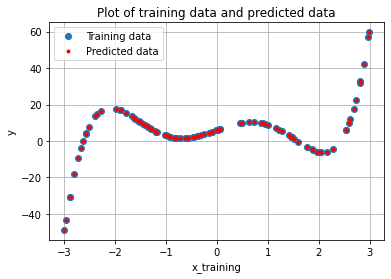

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#Load train data
x_train = np.load('x_train.npy').T
y_train = np.load('y_train.npy')
tr_len = x_train.size

#Load test data
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

#Max power for polynomial fit
max_pow = 5

#Form X and Y matrices for normal equation
X = np.ones(tr_len)
for i in np.arange(1,max_pow+1):
  X = np.vstack([X, x_train**i])

X = X.T
Y = y_train

#Find theta array
theta = (np.linalg.inv((X.T).dot(X))).dot((X.T).dot(Y))
print("Theta: ", theta)

#Calculate the hypothesis function based on training data
h_train = theta[0]
for i in np.arange(1,max_pow+1):
  h_train = h_train + theta[i]*x_train**i


#Regression done. Now plot to see if the hypothesis match the training data
plt.plot(x_train.T,y_train.T,'o', label = "Training data")
plt.plot(x_train.T,h_train.T,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("x_training")
plt.ylabel("y")
plt.title("Plot of training data and predicted data")

plt.grid()
plt.show()

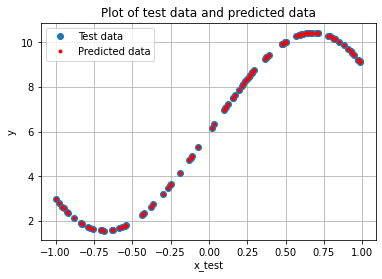

In [33]:
#Calculate the hypothesis function based on test data
h_test = theta[0]
for i in np.arange(1,max_pow+1):
  h_test = h_test + theta[i]*x_test**i

#Now let's see if the hypothesis match the test data
plt.plot(x_test,y_test,'o', label = "Test data")
plt.plot(x_test,h_test,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("x_test")
plt.ylabel("y")
plt.title("Plot of test data and predicted data")

plt.grid()
plt.show()

In [34]:
#Calculate error (cost function) for training data
J_train = 0.5 * np.sum((h_train - y_train)**2)
print("Train error: ", J_train)

#Calculate error (cost function) for test data
J_test = 0.5 * np.sum((h_test - y_test)**2)
print("Test error: ",J_test)

Train error:  7.9172161068618265e-25
Test error:  5.131900106250689e-26


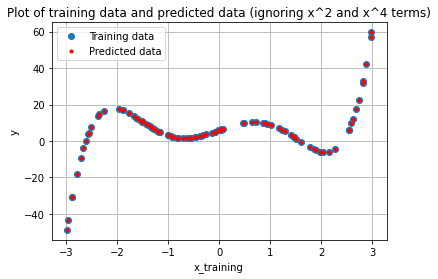

In [35]:
#Since the co-efficients (theta) of x^2 and x^4 are negligible, ignore them and plot training data again
h_train_new = theta[0] + theta[1]*x_train + theta[3]*x_train**3 + theta[5]*x_train**5

plt.plot(x_train.T,y_train.T,'o', label = "Training data")
plt.plot(x_train.T,h_train_new.T,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("x_training")
plt.ylabel("y")
plt.title("Plot of training data and predicted data (ignoring x^2 and x^4 terms)")

plt.grid()
plt.show()

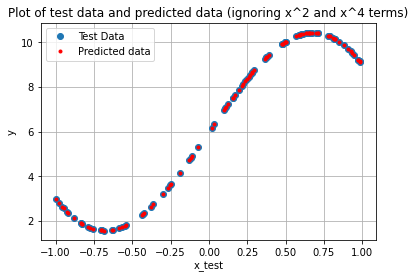

In [36]:
#Also plot test data ignoring x^2 and x^4 terms
h_test_new = theta[0] + theta[1]*x_test + theta[3]*x_test**3 + theta[5]*x_test**5

plt.plot(x_test,y_test,'o', label = "Test Data")
plt.plot(x_test,h_test_new,'r.', label = "Predicted data")

plt.legend()
plt.xlabel("x_test")
plt.ylabel("y")
plt.title("Plot of test data and predicted data (ignoring x^2 and x^4 terms)")

plt.grid()
plt.show()

In [37]:
#Calculate error (cost function) again
J_train_new = 0.5 * np.sum((h_train_new - y_train)**2)
print("Train error (new): ", J_train_new)

J_test_new = 0.5 * np.sum((h_test_new - y_test)**2)
print("Test error (new): ",J_test_new)

Train error (new):  7.761201853041103e-25
Test error (new):  3.686359336049432e-26
